<a href="https://colab.research.google.com/github/Mokaba23/Data-science-portfolio/blob/main/Automobile_data_Model_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Model development**

In data analytics, we often use Model Development to help us predict future observations from the data we have.

A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/sample_data/02. Data Wrangling - clean_df.csv')

In [3]:
data.head(10)

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,27,13495.0,11.190476,Low,0,1,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,27,16500.0,11.190476,Low,0,1,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,5000.0,19,26,16500.0,12.368421,Medium,0,1,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,5500.0,24,30,13950.0,9.791667,Low,0,1,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,5500.0,18,22,17450.0,13.055556,Low,0,1,1,0
5,5,2,122,audi,two,sedan,fwd,front,99.8,0.851994,...,5500.0,19,25,15250.0,12.368421,Low,0,1,1,0
6,6,1,158,audi,four,sedan,fwd,front,105.8,0.925997,...,5500.0,19,25,17710.0,12.368421,Low,0,1,1,0
7,7,1,122,audi,four,wagon,fwd,front,105.8,0.925997,...,5500.0,19,25,18920.0,12.368421,Low,0,1,1,0
8,8,1,158,audi,four,sedan,fwd,front,105.8,0.925997,...,5500.0,17,20,23875.0,13.823529,Medium,0,1,0,1
9,9,2,192,bmw,two,sedan,rwd,front,101.2,0.849592,...,5800.0,23,29,16430.0,10.217391,Low,0,1,1,0


Linear Regression
One example of a Data Model that we will be using is:

Simple Linear Regression

Simple Linear Regression is a method to help us understand the relationship between two variables:

The predictor/independent variable (X)

The response/dependent variable (that we want to predict)(Y)

The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.



In [4]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm

LinearRegression()

In [5]:
#using highway-mpg to predict the price

X = data[['highway-mpg']]
Y = data['price']

In [6]:
#Fit the linear model using highway-mpg:

lm.fit(X,Y)

LinearRegression()

In [7]:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [8]:
#the intercept of the model

lm.intercept_

38423.3058581574

In [9]:
#coeffficient of the model

lm.coef_

array([-821.73337832])

**What is the final Linear model?**

Price = 38423.31 - 821.73 x highway-mpg



In [10]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [11]:
#is the price independent on the engine-size
X = data[['engine-size']]
Y = data['price']

lm1.fit(X, Y)


LinearRegression()

In [12]:
yhat = lm1.predict(X)
yhat[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [13]:
lm1.coef_

array([166.86001569])

In [14]:
lm1.intercept_

-7963.338906281042

In [15]:
print(f"The equation is: Price = {lm1.coef_}*engine-size+{lm1.intercept_}")


The equation is: Price = [166.86001569]*engine-size+-7963.338906281042


Multiple Linear Regression
What if we want to predict car price using more than one variable?

If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression. Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:


From the previous section we know that other good predictors of price could be:



*   Horsepower
*   Curb-weight
*   Engine-size
*   Highway-mpg


Let's develop a model using these variables as the predictor variables.

In [16]:
Z = data[['horsepower','curb-weight','engine-size','highway-mpg']]

In [17]:
lm.fit(Z,data['price'])

LinearRegression()

In [18]:
lm.intercept_

-15811.863767729232

In [19]:
lm.coef_

array([53.53022809,  4.70805253, 81.51280006, 36.1593925 ])

The final Multiple regression model:

Price = -15811.863767729232+ 53.53022809 x horsepower + 4.70805253 x curb-weight + 81.51280006 x engine-size + 36.1593925  x highway-mpg



In [20]:
#using 'normalized-losses' and 'highway-mpg' to predict the price

lm2 = LinearRegression()
lm2



LinearRegression()

In [21]:
x = data[['normalized-losses','highway-mpg']]
y = data['price']

yhat = lm2.fit(x,y)


In [22]:
lm2.intercept_

38201.31327245728

In [23]:
lm2.coef_

array([   1.49789586, -820.45434016])

The Multiple Regression model is:

Price = 38201.31327245728 + 1.49789586 x normalized-losses - 820.45434016 x highway-mpg

Explaining the model: The price of the car has a positive relationship with the normalized-losses and a negative relationship with the highway-mpg


**Model Evaluation Using Visualization**

In [24]:
import seaborn as sns
%matplotlib inline

**Regression Plot**

When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.

This plot will show a combination of a scattered data points (a scatterplot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

Let's visualize **highway-mpg** as potential predictor variable of price:



(0.0, 48164.0552156021)

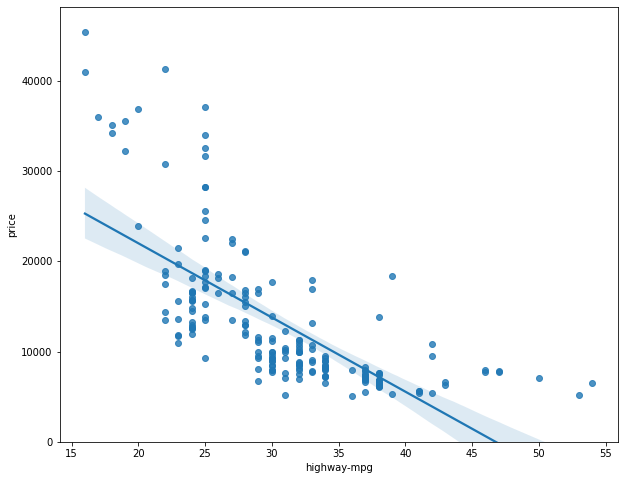

In [25]:
plt.figure(figsize=(10,8))
sns.regplot(x='highway-mpg',y='price', data= data)
plt.ylim(0,)

We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative. One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data. Let's compare this plot to the regression plot of "peak-rpm".



(0.0, 47414.1)

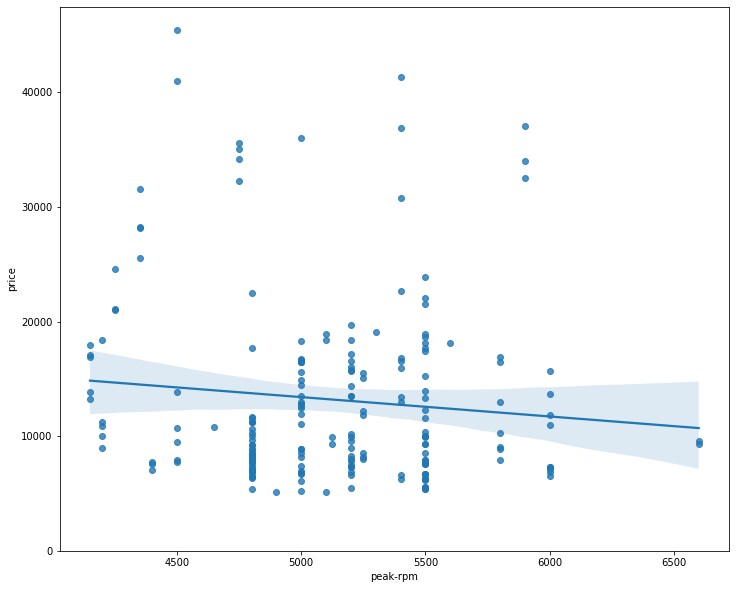

In [26]:
plt.figure(figsize=(12,10))
sns.regplot(x='peak-rpm', y='price',data=data)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.



(0.0, 53090.61065386711)

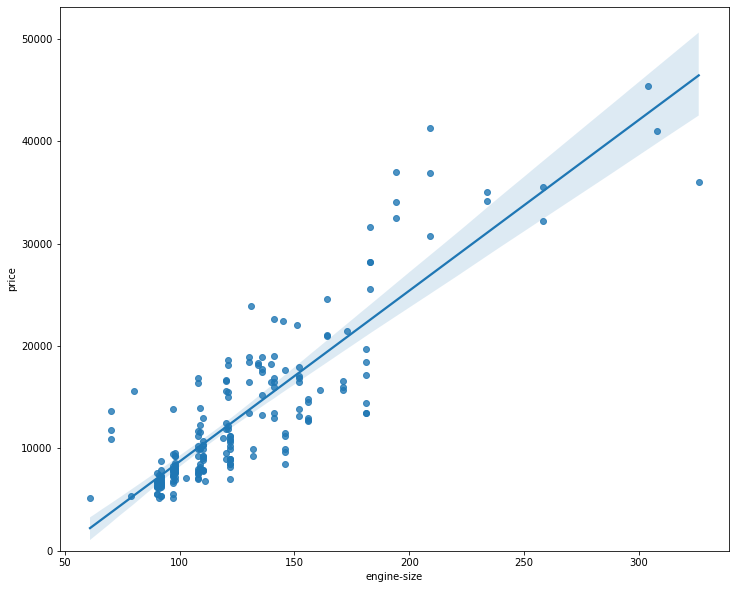

In [27]:
plt.figure(figsize=(12,10))
sns.regplot(x='engine-size', y='price',data=data)
plt.ylim(0,)

The engine-size has a positive relationship with the price of the car.

In [28]:
data[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


**Residual Plot**

A good way to visualize the variance of the data is to use a residual plot.

What is a residual?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


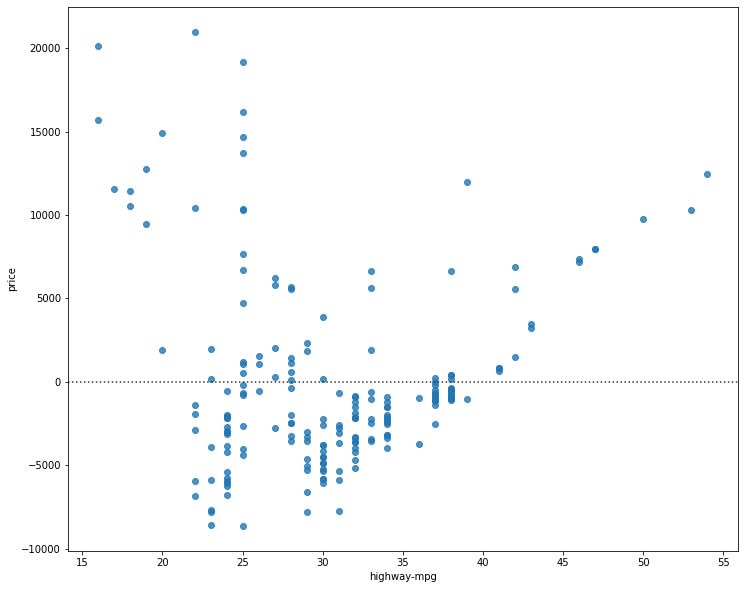

In [29]:
plt.figure(figsize=(12,10))
x = data[['highway-mpg']]
y = data['price']
sns.residplot(x,y,data=data)
plt.show()

What is this plot telling us?

We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.



**Multiple Linear Regression**

How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

First, let's make a prediction:

In [30]:
Y_hat = lm.predict(Z)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


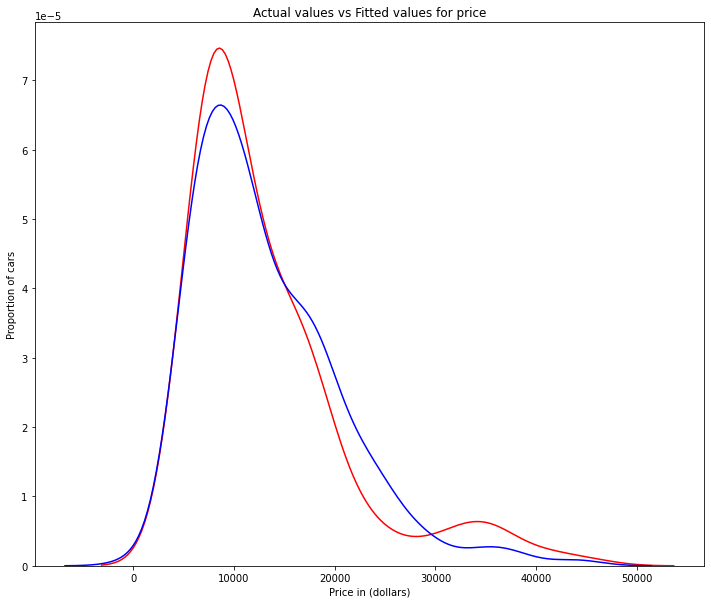

In [31]:
plt.figure(figsize=(12,10))

ax1 = sns.distplot(data['price'], hist=False, color='r', label='Actual Label')
sns.distplot(Y_hat,hist=False,color='b',label='Fitted values',ax=ax1)

plt.title('Actual values vs Fitted values for price')
plt.xlabel('Price in (dollars)')
plt.ylabel('Proportion of cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.



Polynomial Regression and Pipelines
Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.



We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

We will use the following function to plot the data:



In [58]:
def PlotPolly(model,independent_variable,dependent_variable,Name):
  x_new = np.linspace(15, 55, 100)
  y_new = model(x_new)

  plt.plot(independent_variable,independent_variable,'.', x_new, y_new,'-')
  plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
  ax = plt.gca()
  ax.set_facecolor((0.898, 0.898, 0.898))
  fig = plt.gcf()
  plt.xlabel(Name)
  plt.ylabel('Price of the car')
  
  plt.show()
  plt.close()


In [59]:
x = data['highway-mpg']
y = data['price']

Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.



In [60]:
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


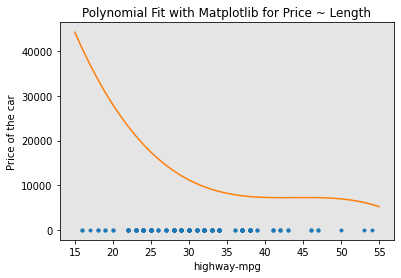

In [62]:
PlotPolly(p, x, y, 'highway-mpg')

In [36]:
np.polyfit(x, y, 3)


array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [40]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)


            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


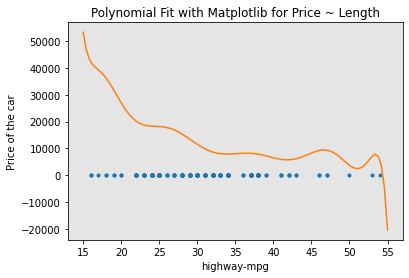

In [41]:
PlotPolly(p1, x, y, 'highway-mpg')


In [38]:
from sklearn.preprocessing import PolynomialFeatures


In [39]:
pr=PolynomialFeatures(degree=2)
pr


PolynomialFeatures()

In [63]:
Z_pr=pr.fit_transform(Z)


In [64]:
Z.shape


(201, 4)

In [65]:
Z_pr.shape


(201, 15)

Pipeline

There are many steps to getting a prediction. For example, normalization, polynomial transform, and linear regression. We simplify the process using a pipeline. Pipeline sequentially perform a series of transformations. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.



In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.



In [69]:
Input = [('scale',StandardScaler()),('Polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

We input the list as an argument to the pipeline constructor:



In [70]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('Polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data, perform a transform and fit the model simultaneously.



In [71]:
Z = Z.astype(float)
pipe.fit(Z,y)


Pipeline(steps=[('scale', StandardScaler()),
                ('Polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously.



In [72]:
ypipe=pipe.predict(Z)
ypipe[0:4]


array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955])

In [73]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]


array([13699.07700462, 13699.07700462, 19052.71346719, 10620.61524404,
       15520.90025344, 13869.27463809, 15455.88834114, 15973.77411958,
       17612.7829335 , 10722.47987021])

**Measures for In-Sample Evaluation**

When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

R^2 / R-squared

Mean Squared Error (MSE)

**R-squared**

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

**Mean Squared Error (MSE)**

The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).

Model 1: Simple Linear Regression


In [75]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))


The R-square is:  0.7609686443622008


We can say that ~76.096% of the variation of the price is explained by this simple linear model "highway-mpg".

Let's calculate the MSE:

We can predict the output i.e., "yhat" using the predict method, where X is the input variable:



In [76]:
Yhat = lm.predict(X)
Yhat[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [77]:
from sklearn.metrics import mean_squared_error

We can compare the predicted results with the actual results:



In [79]:
mse = mean_squared_error(data['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)


The mean square error of price and predicted value is:  15021126.025174143


**Model 2: Multiple Linear Regression**


In [80]:
#Let's calculate the R^2:
# fit the model 
lm.fit(Z, data['price'])

# Find the R^2
print('The R-square is: ', lm.score(Z, data['price']))



The R-square is:  0.8093732522175299


We can say that ~80.937 % of the variation of price is explained by this multiple linear regression "multi_fit".

Let's calculate the MSE.

We produce a prediction:



In [81]:
Y_predict_multifit = lm.predict(Z)


We compare the predicted results with the actual results:



In [83]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(data['price'], Y_predict_multifit))


The mean square error of price and predicted value using multifit is:  11979300.34981888


**Model 3: Polynomial Fit**

In [84]:
from sklearn.metrics import r2_score

In [85]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)


The R-square value is:  0.674194666390652


We can say that ~67.419 % of the variation of price is explained by this polynomial fit.



In [87]:
mean_squared_error(data['price'], p(x))


20474146.426361218

**Decision Making: Determining a Good Model Fit**

Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

**What is a good R-squared value?**

When comparing models, the model with the higher R-squared value is a better fit for the data.

**What is a good MSE?**

When comparing models, the model with the smallest MSE value is a better fit for the data.

Let's take a look at the values for the different models.

**Simple Linear Regression:** Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.49659118843391759

MSE: 3.16 x10^7

**Multiple Linear Regression:** Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

R-squared: 0.80896354913783497

MSE: 1.2 x10^7

**Polynomial Fit:** Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.6741946663906514

MSE: 2.05 x 10^7


**Conclusion**

Comparing these three models, we conclude that the **MLR model** is the best model to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.